# Introduction

- For this assignment, you need to research an introduction to Counting Bloom Filters (CBFs), which are data structures that extend the standard Bloom Filters. You will design and implement in Python a set of CBFs initialized at a given false positive rate, and will need to summarize your findings in a report.

-------

# 1. [#responsibility]

- Take a screenshot of your CS110 dashboard on Forum where the following is visible:
    - your name.
    - your absences for the course have been set to excused up to session 7.2 (inclusively).

- Submit this screenshot as a PNG file on your Python or Jupyter notebook.

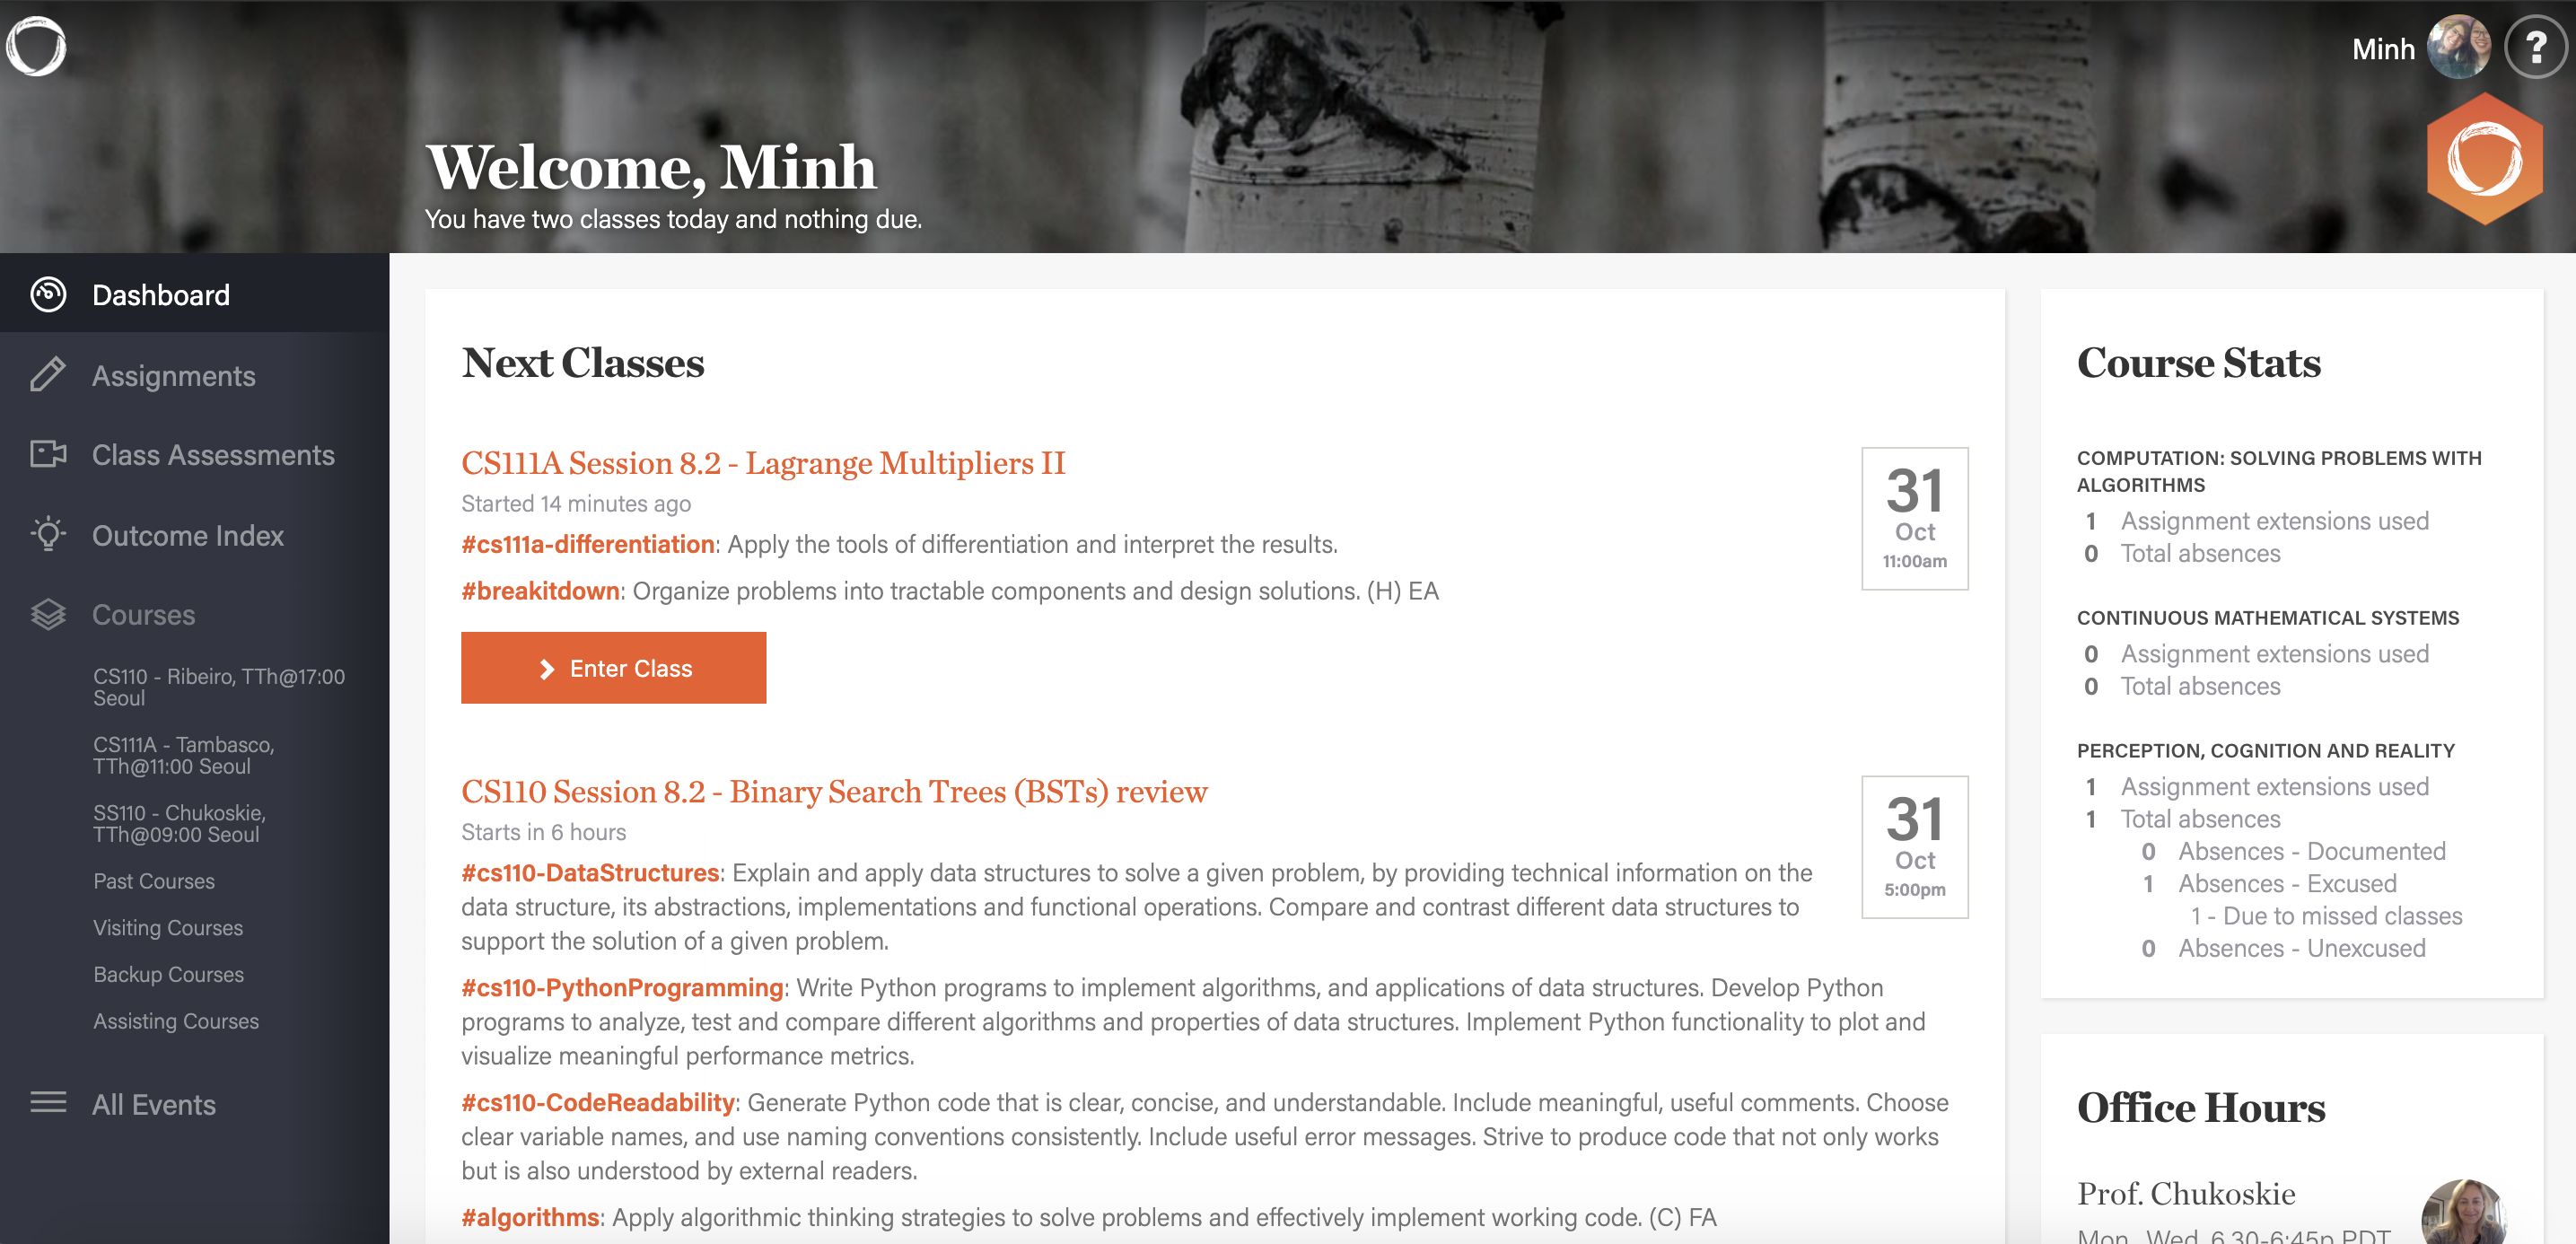

In [46]:
from IPython.display import Image
Image("Image.png")

-------

# 2. [#ComputationalSolutions, #DataStructures, #ComplexityAnalysis]

- Give an overview of the functionality of CBFs, listing all its operations (i.e., from initialize to indexing keys with a given false-positive rate). 
- Give a few examples of computational applications that, in your consideration, can benefit from using CBFs. 

- For every computational application, give meaningful explanations as to why it is a good candidate for CBF.

- **Bloom filter** is a space-efficient probabilistic data structure 
- Purpose: To check whether one element is in the data or not
- A bloom filter is an array with $m$ bits to represent $n$ elements with **k** hash functions
- Since the output is only `True` or `False` so false output is possible in Bloom Filter. In bloom filter, false positive is possible but impossible for false negative. This means that when the output returns `True`, it has **fp** probability that the element is not in the list.

- There are two main functions in Bloom Filter: insertion and query(check) function. There is impossible to have deletion function in bloom filter because of the implementation of insertion function. 

- In the `insertion function` of bloom filter, we only use 0 and 1 to present the answer of the function. For example, in bloom filter, if string `a` by hash function is `14`, the bit $14^{th}$ will increase from 0 to 1. However, if another element of the list is also equal to `14` after another hash function, the bit $14^{th}$ will not increase. As a result, there is **impossible** to have `deletion function` in the bloom filter because the deletion will affect other element. 


- One big advantage of the bloom filter is the space efficiency. This happens because the bloom filter actually does not store the data. It can check whether we have the element in the data but cannot retrieve the data for us.

The picture below will provide briefly information about bloom filter

In [2]:
Image("BF.jpg")

- As we can see, the bloom filter is necessary to save up the space storage but it still has limitation, especially deletion function. The deletion function is vital in practial use because we need to clean the data when we do not need it anymore. In that case, the bloom filter cannot compare to other data structures such as binary search tree, which can help us query one element and delete the node when we want.

- To solve this problem, in 2000, Fan et al. introduced the counting bloom filter by changing the insertion function implementation to make the deletio function impossible

- Counting Bloom Filter (CBF) is the data structure of Bloom Filter that inherit all properties from the bloom filter. CBF use **m** bits to store **n** elements by using **k** hash functions. However, instead of single bit for each entry, CBF uses fix-sized counter. When one element is added to the data, the corresponding counter will be increased by 1. 

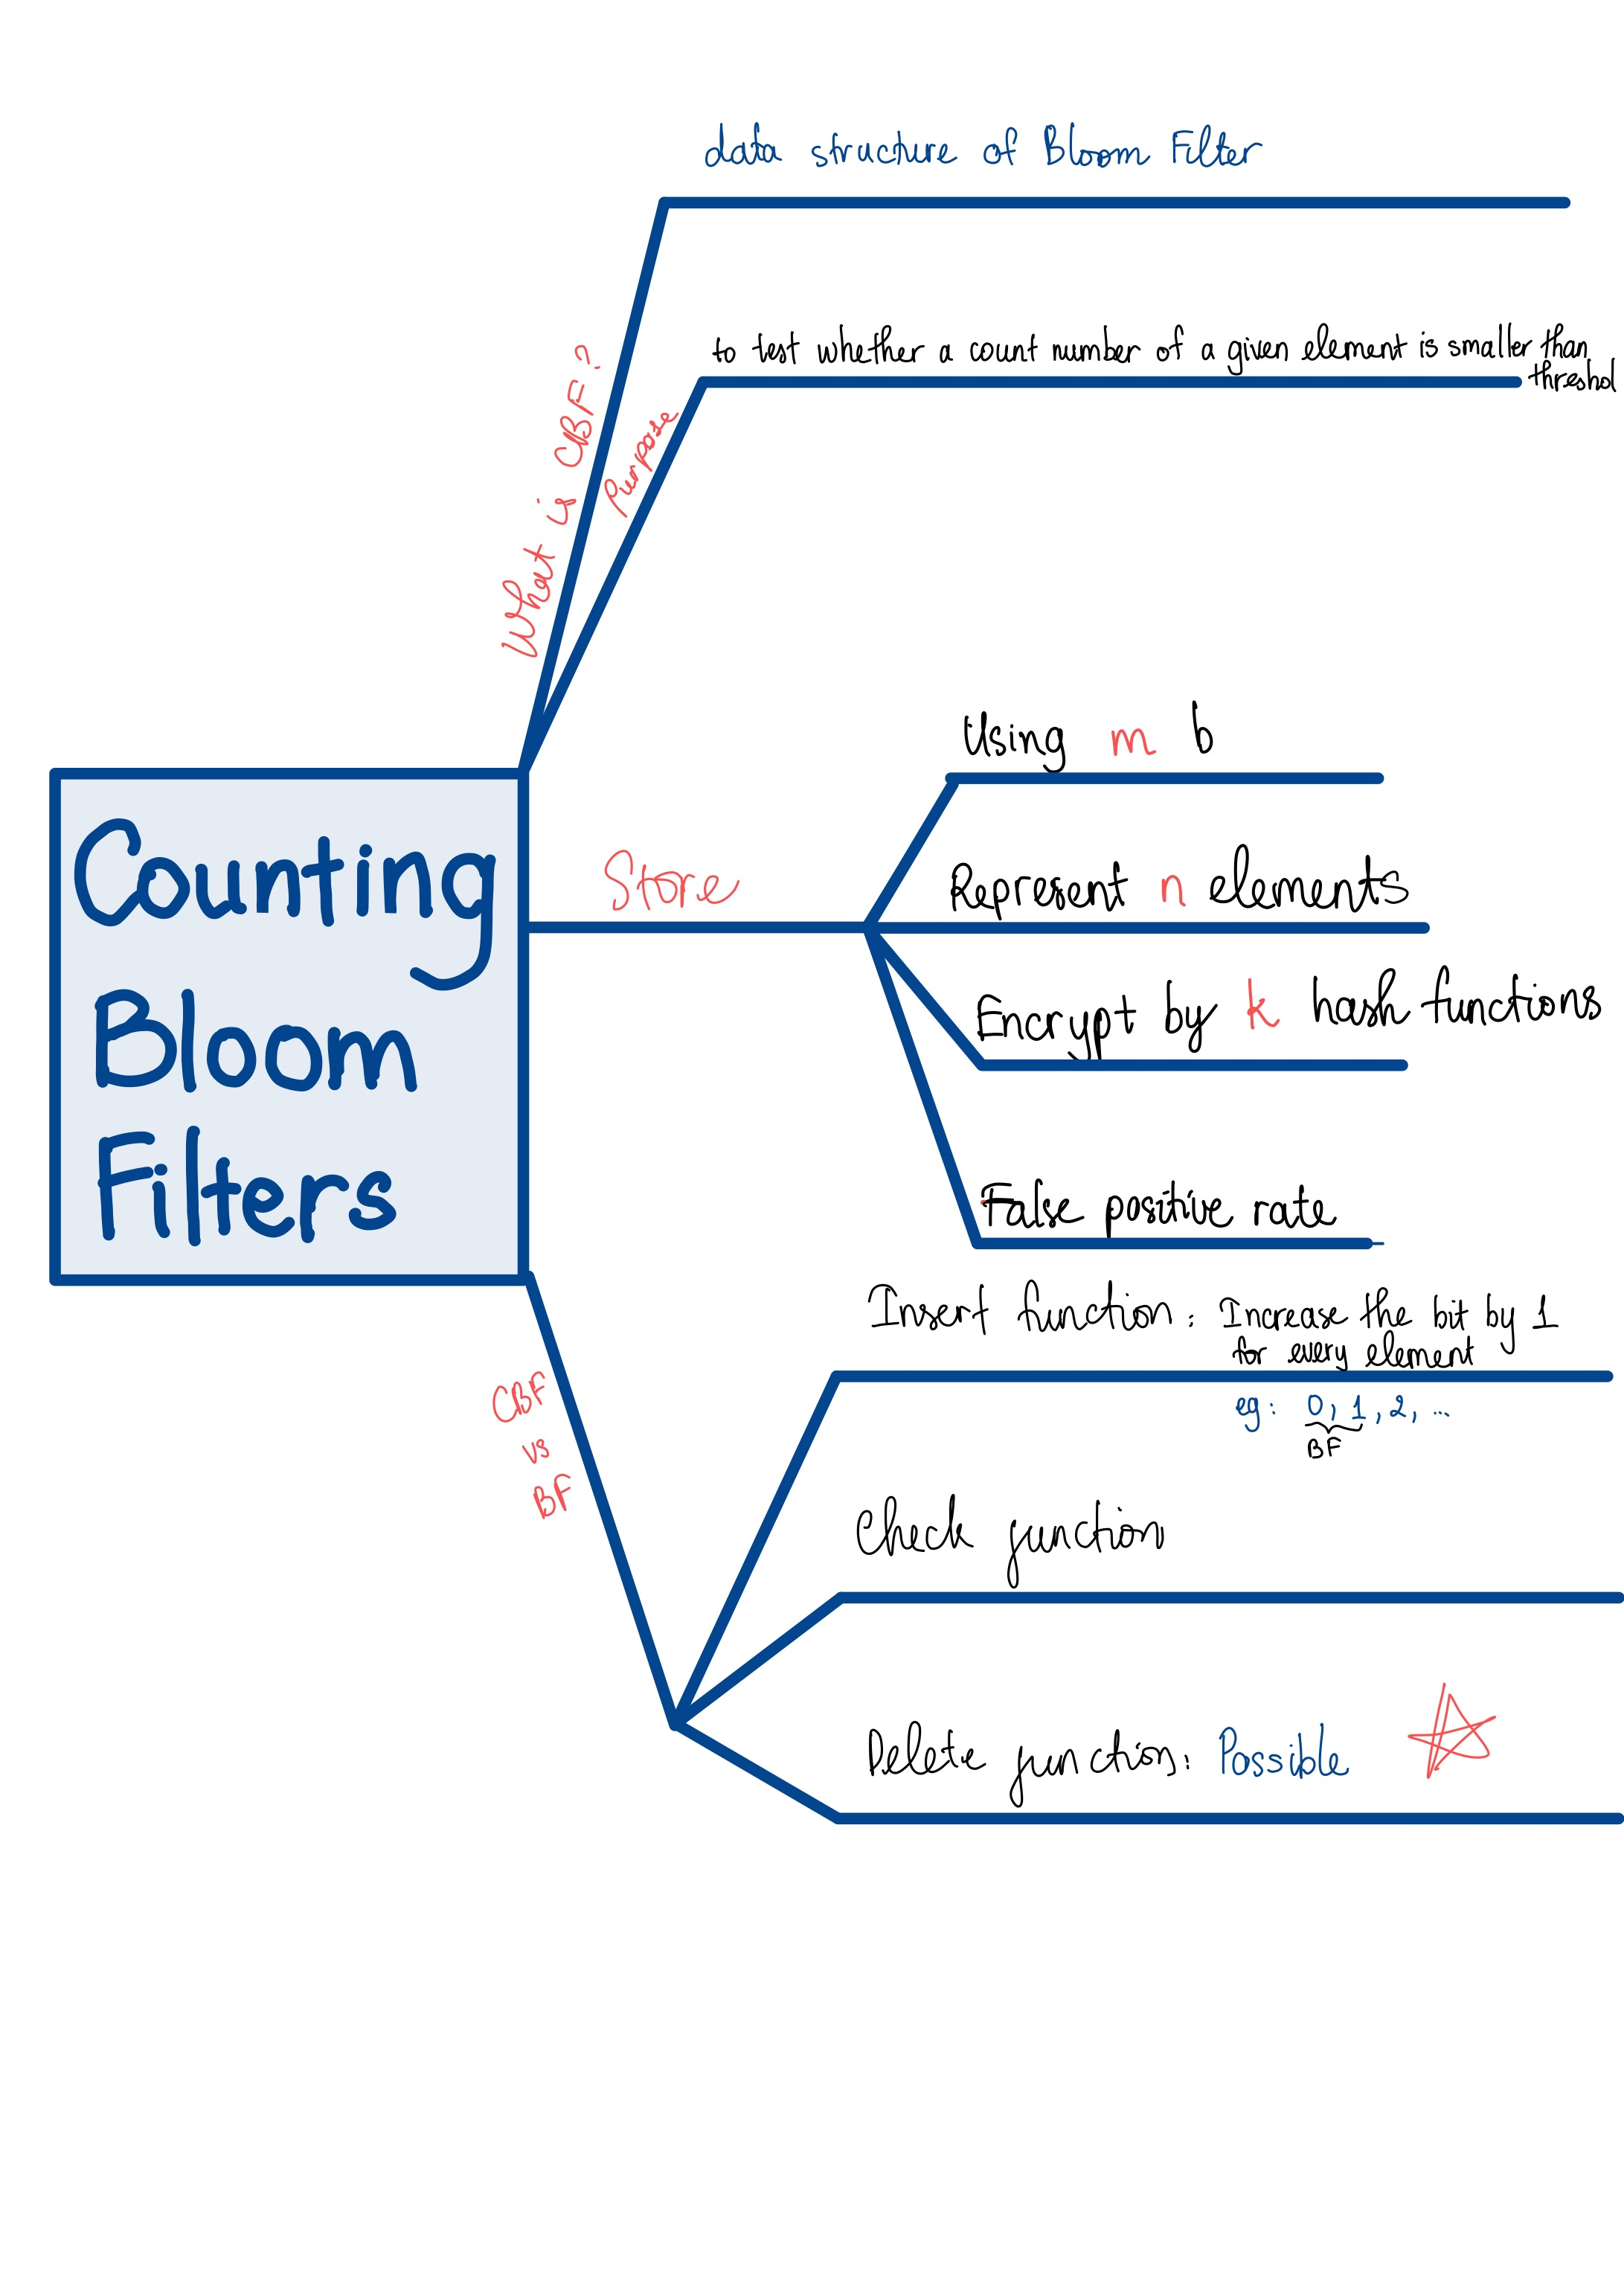

In [3]:
Image("CBF-1.jpg")

For the `insertion function`, when we need to add one new element to the `bloom filter`:
- Convert the string to the integer
- Encrypt the new element by hash functions to have `locations`
- Increase the counter in the corresponding bits by 1

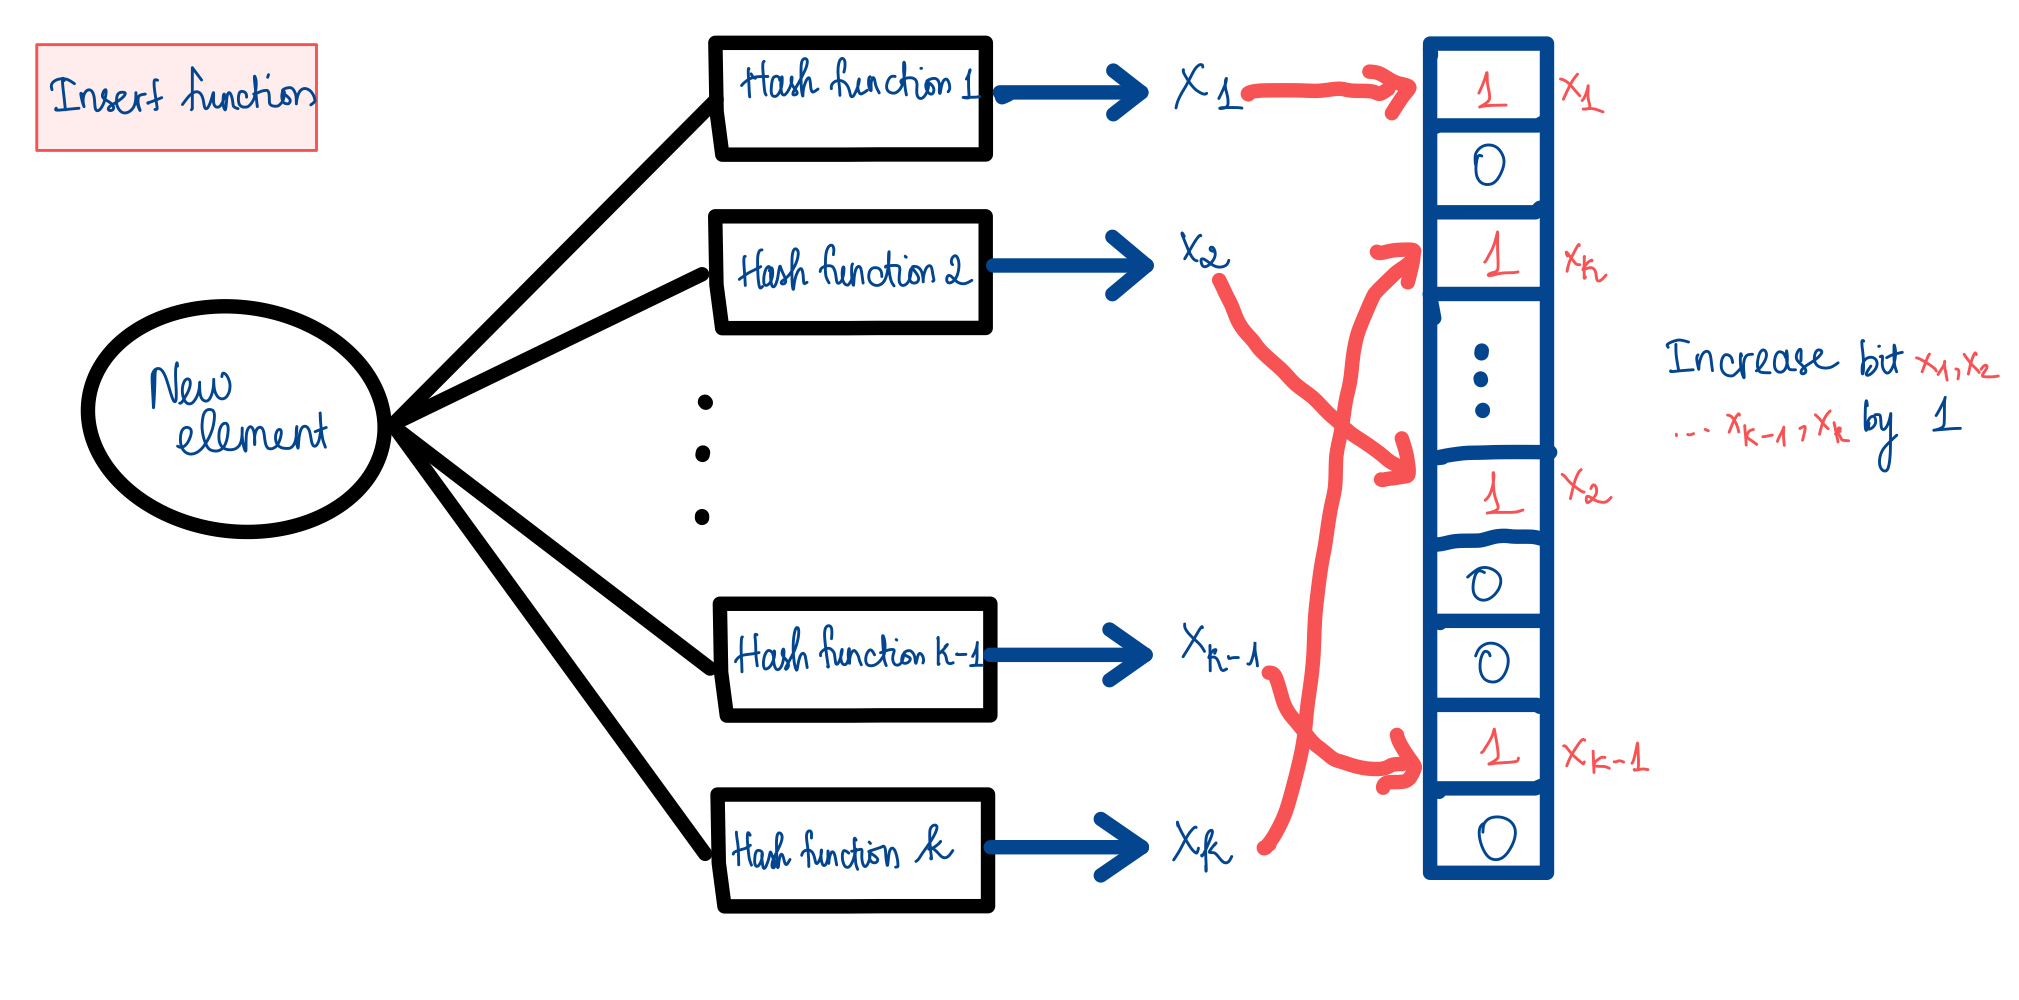

In [4]:
Image("add.jpeg")

To `query` one element (or check whether we have the element in the set) we need to follow these steps:
1. Convert the string to the integer
2. Use hash functions to have `locations` of the `bloom filters`
3. Check the corresponding bits.
    - If all bits are bigger than 0 $\rightarrow$ return True, the element in the list
    - If one bit is 0, $\rightarrow$ return False, the element is not in the list

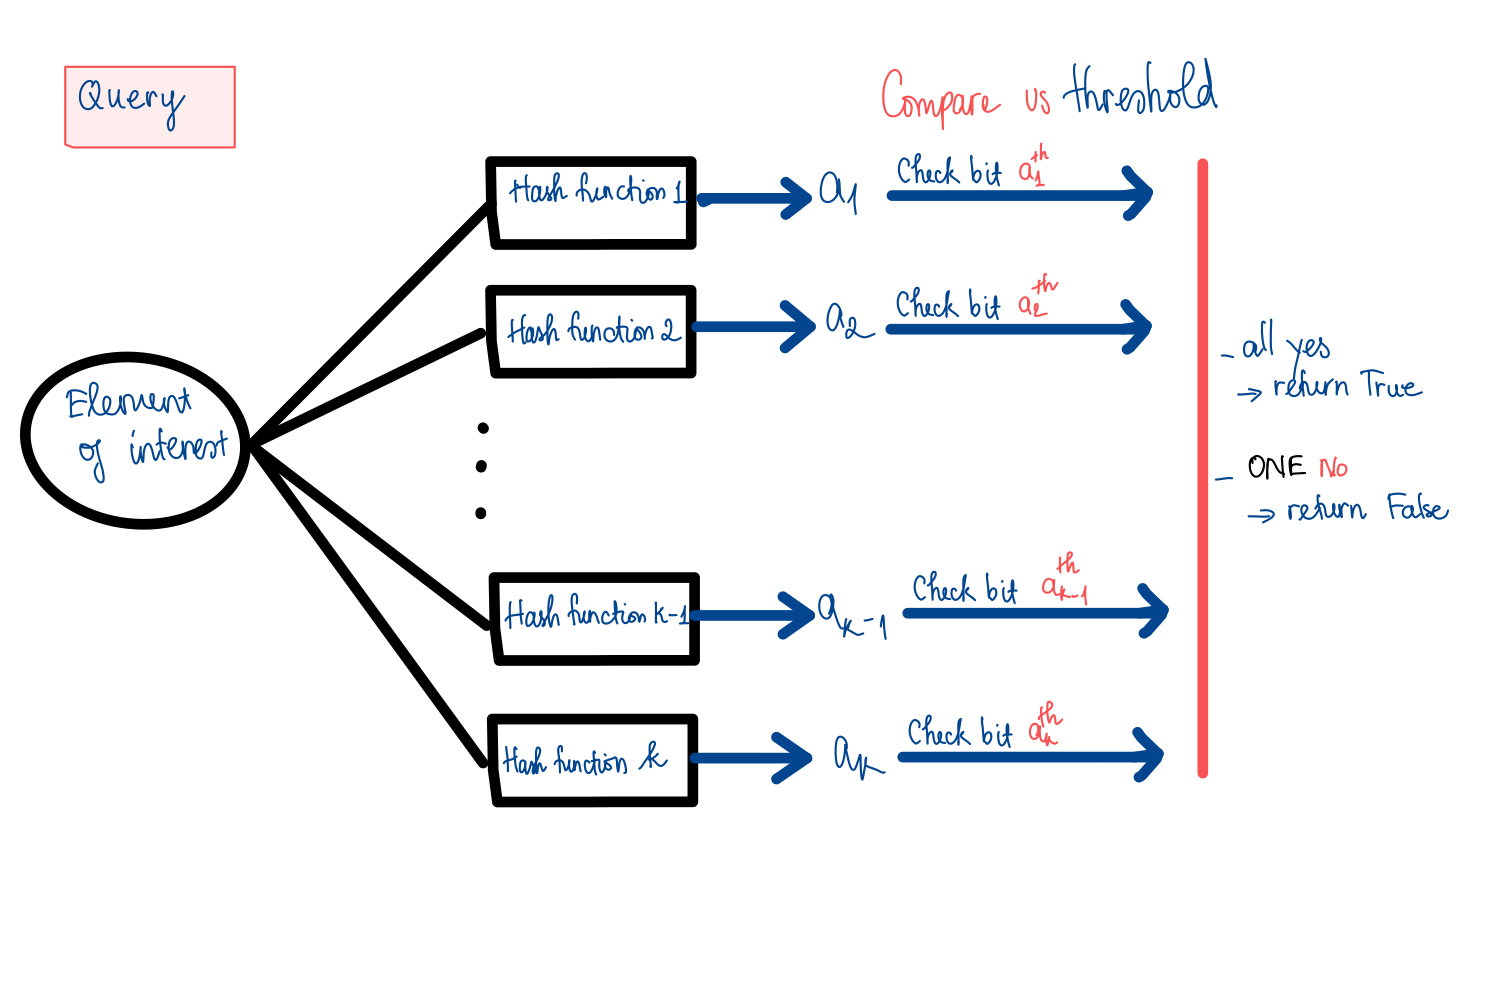

In [5]:
Image("check.jpeg")

To `delete` one element in the set we need to follow these steps:
1. Convert the string to the integer
2. Use hash functions to have `locations` of the `bloom filters`
3. Check the corresponding bits to whether we have that element or not
    - If yes, start decreasing the counter from corresponding bits
    - If no, return False

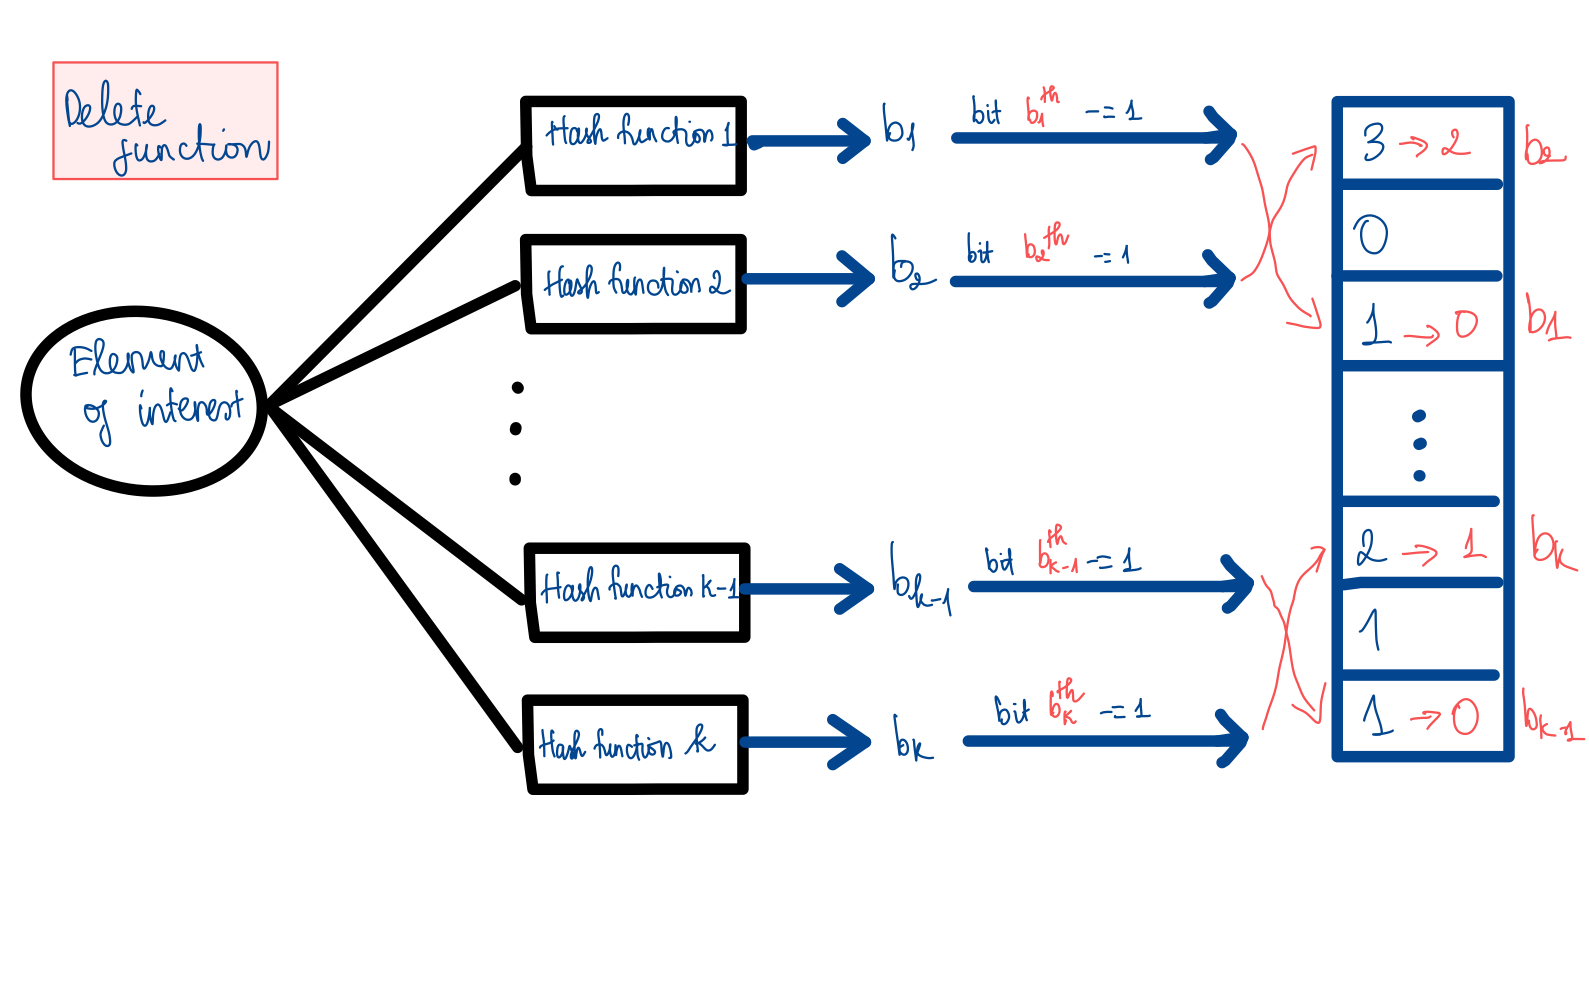

In [6]:
Image("delete.jpeg")

## Example:

- When we create a new facebook account, we need to create a distinct username. To check that quickly, we can use the bloom filter to check whether the username is existed or not. This approach is much more better than binary search tree because it saves a lot of time. 

- When someone tries to delete the facebook account, this is when the counting bloom filter is much better than the bloom filter because we can have delete function. Even though the counting bloom filter may take more space to store more bits with different values, we can reuse it as we want since we can delete unnecessary information.

-------

# 3. [#DataStructures, #PythonProgramming, #CodeReadability]

- Implement in Python 3 your designed CBFs data structure and all its properties. Make sure you carefullyorganize your Python code, write meaningful comments, and provide a thorough justification for your choice of hash functions. Meaning, why did you think a particular hash function is a good hash function in the context of CBFs.

In [137]:
# import libraries 
import string # for creating input
import random # for randomizing input
random.seed(307)
import math # for math use
import numpy as np # for numerical processing
import matplotlib.pyplot as plt #for plotting

## Create data

In [8]:
#random word with digits and lowercase letters
def randomword(length):
    #characters are the combination of digits and lowercase letters
    characters = string.digits + string.ascii_lowercase
    
    #output
    word = '' 
    
    #create the word based on the length
    for i in range(length): 
        #randomly choose from the characters
        word += random.choice(characters)
    #return the output
    return word

#create data with n elements
def create_data(n):
    word = []
    #create n words
    for i in range (n):
        length = random.randint(1,10)
        word.append(randomword(length)) 
    return word

## Convert string to integer

In [9]:
#covert string to integer by using ascii
def converter(x):
    #change x to type string
    x = str(x)
    
    #the integer
    output = 0
    
    #convert all characters of the string
    for i in range (len(x)):
        #the character * 2^i
        output += (ord(x[i])*(2**i))
    return output

converter('zzzzzzzzz')


62342

## Create hash functions and encrypt

- In this assignment, I choose to use the universal hashing function because its distribution is uniform and independent, which are crucial criteria when choosing the hash function for CBF.

- The hash function: For any $a \in Z\ast$ and $b \in Z$, using a
linear transformation followed by reductions modulo $p$ and then modulo $m$: $$h_{ab}(x) = ((ax + b) \; mod \: p) \; mod \: m $$ 

- I choose to use the base `2` for converting number based on the polynomial hashing function (to eliminate the collisions as many as possible)

- Since I need to chosoe`p`, that is bigger than `m`. The biggest `m` is `62342`, so `p` is bigger than $2^{16}$

In [10]:
#the function to check whether x is prime number
def Prime(x):
    new = int( x ** 0.5) + 1
    if x < 2:
        return False
    for i in range (2, new):
        if x % i == 0:
            return False
    return True

#find the smallest prime number bigger than x
def find_prime(x):
    right = x
    while True:
        #if the number is prime -> return that number
        if Prime(right):
            return right
        #else increase the pointer by 1
        else:
            right += 1

#randomly pick multiplier and increment
def hash_multiplier(p):
    #a is multiplier
    a = random.randint(1,p-1)
    
    #b is increment
    b = random.randint(0,p-1)
    
    return [a,b,p]

#create hash function
def create_hash_function(k):
    
    #list of hash functions
    hash_function = []
    
    #generate k functions
    for i in range (k):
        #pick randomly one element and find the smallest prime bigger than that
        #p must be a prime bigger than m (the largest m is 62342 - 'zzzzzzzzz')
        p = find_prime(random.randrange(2**16 + 1, 2**18 + 1, 2))
        
        #create the hash function
        coefficient = hash_multiplier(p)
        
        #add the [a,b,p] to hash function
        hash_function.append(coefficient)
    
    #hash function
    return hash_function

#running the element through the hash_function
def find_location(x, hash_function):
    
    #store all the encrypted location
    location = []
    
    #running through all hash_function
    for i in hash_function:
        #[(a * x + b) % p] % m
        location.append(((i[0] * x + i[1]) % i[2]) % m)
    #all locations
    return location

## Insert function, Import function, Delete function, Query function

In [45]:
#insert x to bloom_filter
def insert(bloom_filter, x, hash_function):
    
    #covert the string to the integer
    new_input = converter(x)
    
    #find the location of the elements
    location = find_location(new_input, hash_function)
    
    #increase the bits
    for i in location:
        bloom_filter[i] += 1
        
    #return bloom_filter
    return bloom_filter

#import all elements from data
def import_element(bloom_filter, data, hash_function):
    
    #insert all elements in the data list
    for i in data:
        insert(bloom_filter, i, hash_function)

#delete the elements
def delete(bloom_filter, x, hash_function):
    
    #convert the string to integer
    remove = converter(x)
    
    #find the location of the element in the bloom_filter
    location = find_location(remove, hash_function)
    
    #decrease the bits
    for i in location:
        if bloom_filter[i] >= 1:
            bloom_filter[i] -= 1
        else:
            return False
    
    #return the array of bits
    return bloom_filter

#query element
def check(bloom_filter, x, hash_function, threshold):
    
    #convert the string to integer
    check = converter(x)
    
    #find the location of the element in the bloom filter
    location = find_location(check, hash_function)
    
    #multiple all bits from location
    for i in location:
        if bloom_filter[i] < threshold:
            return False
    return True

## Test function

In [38]:
#result function for True positive/False positive/True negative
def false_positive_check(bloom_filter, data, number_of_tests, hash_function, threshold):
    
    #create number_of_tests words to query
    tests_cases = [random.choice(data) for i in range (number_of_tests)]
    
    negative = 0
    false_positive = 0
    
    #query all words in the tests_cases
    for i in tests_cases:
        
        #result is the output of check(query) function
        result = check(bloom_filter,i, hash_function,threshold)
        
        #count element:
        cnt = data.count(i)
        
        #if the result is True
        if result:
            if cnt >= threshold:
#                 print('True positive')
                continue
            else:
#                 print('False positive')
                false_positive +=1
                negative +=1
        else:
#             print('True negative')
            negative +=1
    return (false_positive/negative)

In [39]:
#function to check the import, insert and result function
def bloom_filter_check(k, m, n, threshold):
    
    bloom_filter = [0]*m
    
    data = create_data(n) 
    
    for i in range (n):
        data.append(random.choice(data))
    
    hash_function = create_hash_function(k)
    
    import_element(bloom_filter, data, hash_function)

    fp = false_positive_check(bloom_filter, data, 100, hash_function,threshold)
    
#     print('The false positive rate is', fp)
    
    return fp

In [102]:
m = 100
n = 1000
k = 10
bloom_filter_check(k, m,n,150)

False positive
True negative
False positive
False positive
True negative
False positive
False positive
False positive
False positive
True negative
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
False positive
True negative
False positive
False positive
False positive
True negative
False positive
False positive
False positive
True negative
True negative
False positive
False positive
False positive
True negative
False positive
False positive
True negative
True negative
False positive
False positive
False positive
False positive
False positive
False positive
True negative
False positive
False positive
True negative
False positive
False positive
False positive
False positive
False positive
True negative
False positive
True negative
False positive
False pos

0.83

In [103]:
#test the deletion test
def deletion_tests(k,m,n):
    
    #create data
    data = create_data(n)
    
    #create bloom_filter
    bloom_filter = [0]*m
    
    #create hash_function
    hash_function = create_hash_function(k)
    
    #import data
    import_element(bloom_filter, data, hash_function)
    
    print('Before deleting:' , bloom_filter)
    
    #delete all elements of data
    for i in data:
        delete(bloom_filter, i, hash_function)
        
    print('After deleting:', bloom_filter)

#tests
deletion_tests(5,m,n)

Before deleting: [46, 51, 51, 47, 45, 51, 37, 40, 41, 53, 45, 46, 32, 57, 43, 49, 46, 46, 40, 56, 56, 51, 53, 48, 50, 53, 53, 53, 59, 55, 50, 51, 67, 44, 50, 59, 37, 54, 51, 61, 84, 71, 51, 45, 67, 54, 62, 28, 50, 48, 46, 49, 65, 52, 48, 36, 33, 55, 57, 36, 50, 45, 50, 52, 69, 46, 50, 57, 56, 53, 50, 41, 43, 52, 57, 61, 58, 30, 44, 49, 51, 55, 27, 46, 60, 55, 61, 55, 39, 44, 44, 35, 49, 45, 38, 52, 56, 58, 52, 51]
After deleting: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


-------

# 4. Python implementation & Analysis

- Using your own Python implementation from question 3, generate data to push into the CBFs. 


- Provide an analysis, both on theoretical grounds and using experimental corroboration, of how your implementation scales in terms of:
    1. **[#DataStructures]** Memory size as a function of the false-positive rate
    
    2. **[#DataStructures]** Memory size as a function of the number of items stored
    
    3. **[#DataStructures, #ComplexityAnalysis]** Access time as a function of the false-positive rate
    
    4. **[#DataStructures, #ComplexityAnalysis]** Access time as a function of the number of items stored

- There is no differences between counting bloom filter and bloom filter in terms of false positive rate, the items stored, and the number of hash functions. 

- To answer the question about the relationship between two variables, I choose to keep other variables constant and optimal as much as possible so I can mitigate bias from choosing different cases

- The false positive rate is $ (1 - e^{-kn/m})^k$

- Optimal number of hash function $k = \frac{m}{n} ln2$

- In this assignment, the memory size is considered as the length of bits $m$, while the number of items stored is $n$ 

- The false positive probability will be **fp** and **k** would be the number of hash functions

- In every subquestion, I will analysis in 2 different ways: theoretical and experomental by using formula and ploting

## **[#DataStructures]** Memory size as a function of the false-positive rate

**First approach**
If we use the generic formula: 
$$fp \approx (1-e^{-kn/m})^k$$

- If we consider the false positive rate is the independent variable and the memory size,**m**, is the dependent variable, then `k` and `n` are the constant in this situation. 

- Since the hash functions we have is uniform and independent, we have the formula as below:

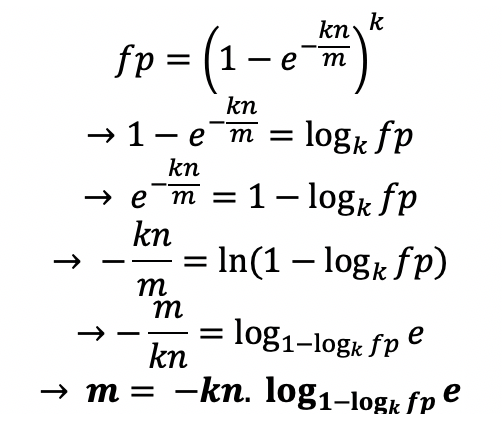

In [16]:
Image('2.png')

- As we can see, the memory size is presented by other variable and constant. 

- When `fp` increases, $(1-e^{\frac{-kn}{m}})^k$ increases 
- Since $k>0$, $1-e^{\frac{-kn}{m}}$ increases
$\rightarrow$ $(e^{\frac{-kn}{m}})$ decreases 

$\rightarrow$ $\frac{-kn}{m}$ decreases 

$\rightarrow$ $\frac{kn}{m}$ increases 

$\rightarrow$ $m$ decreases.

**Second approach**

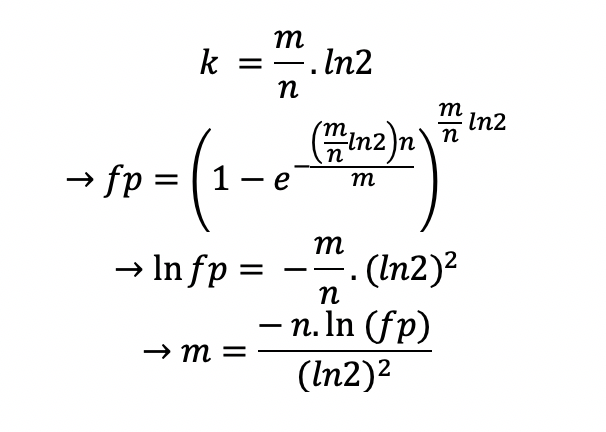

In [104]:
Image('1.png')

- If we use the optimal value for $k$, we can have the equation as above. Since $n$ is constant, $\frac{n}{(\ln 2)^2}$ is the positive constant.

- When $fp$ increases, the $m$ will decrease since $fp < 1$ and $ln(fp) < 0$

**Experimental approach**

In [105]:
#experimental

#starting point
fp = 0.005

#list to store 
false_positive = []
memory_size = []

#when fp is smaller than 1
while fp < 1:
    
    #Calculated the memory size based on the formula
    m = (-n * math.log(fp))/(math.log(2))**2
    
    #append the elements to the list
    false_positive.append(fp)
    memory_size.append(m)
    
    #increase the fasle positive rate
    fp += 0.00005

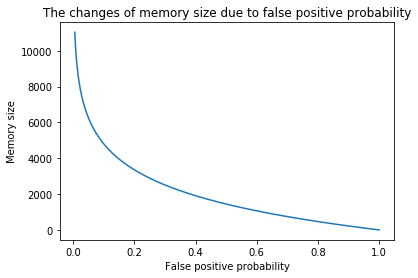

In [106]:
#plot the changes of memory size due to false positive probability
plt.plot(false_positive,memory_size)
plt.title('The changes of memory size due to false positive probability')
plt.xlabel('False positive probability')
plt.ylabel('Memory size')
plt.show()

**Conclusion**
- From all explanations and graph above, we can see matched result of  memory size when we increase the false probability

- This result is reasonable because the universal hash function has uniform distribution of the output of the hash functions, when we increase the false positive probabilty, we need to reduce the slots so that we will have more collisions and the probability of false positive will increase.

-----

## **[#DataStructures]** Memory size as a function of the number of items stored

**First approach:**
- If we use the generic formula: 
$$fp \approx (1-e^{-kn/m})^k$$

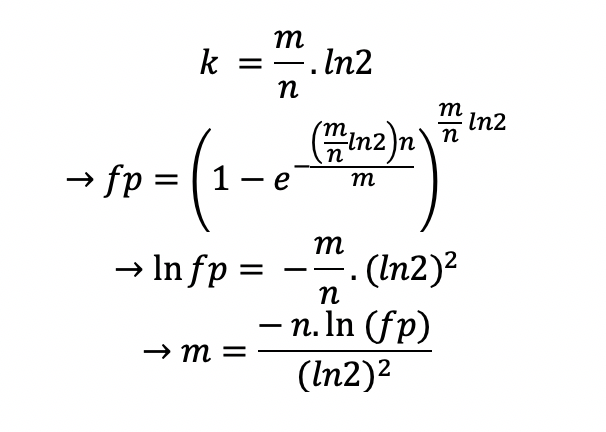

In [20]:
Image('1.png')

- Since we fixed $n$ and $ln(fp) <0 because fp <1 $, we have m increases when n increases with a constant rate is $\frac{n \log_2 fp}{\ln 2}$. As a result, the changes of the memory size when n increases should a line

**Second approach**

- As we can see from the equation below, since we fixed $fp$ and $k$, we have that $-k*log_{1 - log_k(fp)}e$ is constant. 

- Moreover, since $0 < fp < 1$, then $log_{1 - log_k(fp)}e < 0$. As a result, $ m = A * n (A > 0)$ 

- When $n$ increases, $m$ will increases with the rate A

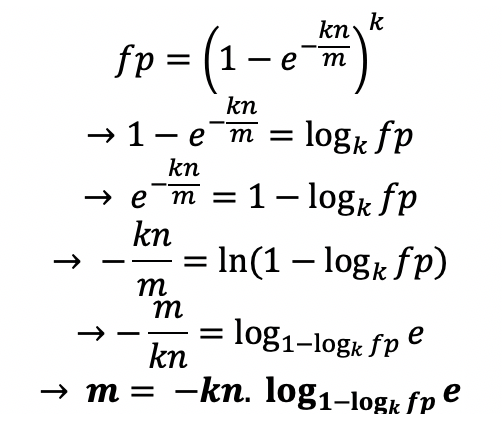

In [21]:
Image('2.png')

**Experiment approach**

- To see the changes of the memory size when the number of items increase, I choose to fix the value of false positive rate and the number of hash functions. 

- By running the test for 1000 times, we can see the trend of changes in the plot below when we increase the number of items stored

In [107]:
#initialize the n value
n = 10

#set up the false positive rate
fp = 0.35

#lists
input_size = []
memory_size = []

#run 1000 times
for i in range (1000):
    
    #calculate m
    m = (-n * math.log(fp))/(math.log(2))**2
    
    #append to the lists
    input_size.append(n)
    memory_size.append(m)
    
    #increase n
    n += 1

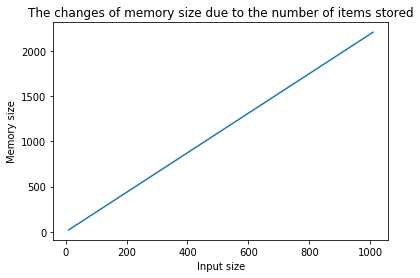

In [108]:
#plot the graph for memory size changes because of input size
plt.plot(input_size,memory_size)
plt.title('The changes of memory size due to the number of items stored')
plt.xlabel('Input size')
plt.ylabel('Memory size')
plt.show()

**Conclusion**: 
- As we can see from both theorectic and experiment, the result shows a positive correlation between the number of items and the memory size. 

- This is plausible because when we increase the number of items, we need more space to avoid collisions and keep the same false positive rate, along with the uniform distribution of the output of the hash functions

## **[#DataStructures, #ComplexityAnalysis]** Access time as a function of the false-positive rate


- In terms of time, I choose the function `bloom_filter_check` which is creating data randomly, querying words randomly and return the false positive rate. 

- Since there is a close connection between `k` and `false_positive rate` and the number of hash functions will decide the running time of the function. As a result, I choose to keep the `m` and `n` constantly and changing `false positive rate` and `k`.

- In this situation, I want to test how the time changes when `fp` changes and `k` changes. The formula I used to calculate `k` from `fp` is $$ k = -\frac{\ln fp}{\ln 2} = -log_2 fp$$

**First approach**
- Each time we want to query one element in `bloom filter`, we must go through `k` functions. Hence, the time will have a positive correlation with the number of hash functions.

- If the number of hash functions increases, the function `bloom_filter_check` will need more time to calculate the `locations` and `check k location`. The time access would be $O(k)$

- However, if we consider an ideal situation that $k = -\frac{\ln fp}{\ln 2} = -log_2 fp$ and $ -log_2 fp < 0$, the ideal acess time is $O(log(fp))$

- When we increase the `false positive rate`, the $log_2 fp$ will increase $\rightarrow -log_2 fp$ decrease $\rightarrow$ `k` decrease

**Second approach**

In [117]:
import time

#initialize the value
fp = 0.005
m = 500
n = 100

#the list
false_positive = []
time_count = []

#while fp < 1
while fp < 1:
    
    #temp list is to run many times for one false positive rate
    temp = []
    
    #add false positive to list
    false_positive.append(fp)
    
    #run 150 trials for one false positive rate
    for j in range (150):
        
        #start counting
        start = time.time()
        
        #calcualte k
        k = -int(math.log(fp,2))
        
        #run function with 
        bloom_filter_check(k, m,n,2)
        
        #end time
        end = time.time()
        
        #append to temp list
        temp.append(end-start)
    #calculate the mean of temp and add to time_count
    time_count.append(np.mean(temp))
    
    #increase the false positive rate
    fp += 0.005

In [110]:
print(len(false_positive))
print(len(time_count))

199
199


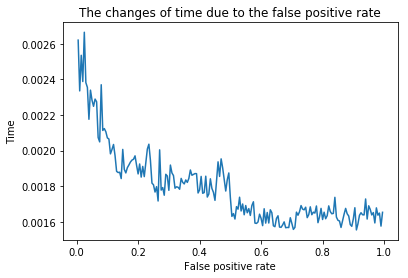

In [118]:
#plot the relation between the time and false positive 
plt.plot(false_positive,time_count)
plt.title('The changes of time due to the false positive rate')
plt.xlabel('False positive rate')
plt.ylabel('Time')
plt.show()

**Conclusion**

- From the figure above, we can see that when the `false positive rate` increases, the `time` decreases. 

- The line is not stable because the function `bloom_filter_check` is a random function from creating data and query elements. Even though I choose to have 150 trials for each value of `false positive rate` and calculate the mean time of 150 trials, it really depends on each case. However, we still can see the trend of the time, decreasing.

- As a result, the experiement graph is matched with the theoretical resut.

## **[#DataStructures, #ComplexityAnalysis]** Access time as a function of the number of items stored

**First approach**

- Use the formula: $$ k = -\frac{\ln fp}{\ln 2} = -log_2 fp$$

- As we can see, the value of `k` does not depends on the value of `n` so even when we increase the `n`, we can see no changes in the time of the function

**Second approach**

In [ ]:
import time

#initialize the variable
m = 500
n = 100
fp = 0.35
items_stored = []
time_count = []

for i in range (20):
    
    #temp list is to store all trials time for one value of n
    temp = []
    
    #add the number of items stored to the list
    items_stored.append(n)
    
    #run 150 trials
    for j in range (150):
        
        #start time
        start = time.time()
        
        #calculate k
        #k = m/n * ln(2)
        k = -int(math.log(fp,2))
        
        #running query function
        bloom_filter_check(k, m,n,2)
        
        #end time
        end = time.time()
        
        #append to temp list
        temp.append(end-start)
        
    #calculate the mean of temp and add to time counter 
    time_count.append(np.mean(temp))
    
    #increase n
    n += 1

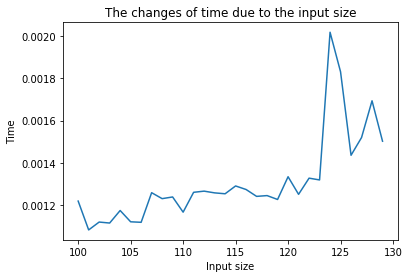

In [156]:
#plot the changes of time when the number of items stored increases
plt.plot(items_stored,time_count)
plt.title('The changes of time due to the input size')
plt.xlabel('Input size')
plt.ylabel('Time')
plt.show()

**Conclusion**

- From the above graph, we can see that the time is changes without any trends and this matched with the result from the theoretical approach.

- As a result, no matter how many the number of elements, the time will not change. The time only changes when we change the number of hash functions.

-------

# 5. [#ComputationalCritique]

- Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.

In [161]:
#theoretical result
def theoretical(k):
    return (1 - np.e**(-k*n/m))**k

In [41]:
#initialize the m and n value
m = 500
n = 100

#store k
index = []

# this is the tracking for the simulation data
avg_fp_simulation = []
# this is the tracking for the theoretical result
theoretical_result = []


for k in range(1,30):
    
    #append k to index
    index.append(k)
    
    #calculate the false positive rate from k
    theoretical_result.append(theoretical(k))
    
    #sampling
    sampling = []
    
    #run 100 trials
    for i in range(100):
        
        #check the false positive rate with the threshold is 2
        sampling.append(bloom_filter_check(k, m, n, 2))
    
    #add to simulation data
    avg_fp_simulation.append(np.mean(sampling))

In [42]:
print(avg_fp_simulation)

[0.20936484635351169, 0.11889109499108405, 0.08600015902547639, 0.09558156567744783, 0.09734008984106239, 0.12628214624970707, 0.13045251173624517, 0.16879906418752152, 0.18095334653844714, 0.23982387106867237, 0.2564067558913427, 0.3116536030324237, 0.37720919156867083, 0.39221354661992597, 0.45365297045300446, 0.497376768026353, 0.5393409954456588, 0.602938026576196, 0.6283918444484762, 0.6711382954083029, 0.72028378983284, 0.7567780485124709, 0.7806818127285687, 0.8021348100642249, 0.8362156556722705, 0.8462429515389961, 0.8770804598116452, 0.8942522537679213, 0.9052375705147432]


In [43]:
print('The smallest value of k in theoretical approach is :', theoretical_result.index(min(theoretical_result)))
print('The smallest value of k in simulation approach is :', avg_fp_simulation.index(min(avg_fp_simulation)))

The smallest value of k in theoretical approach is : 2
The smallest value of k in simulation approach is : 2


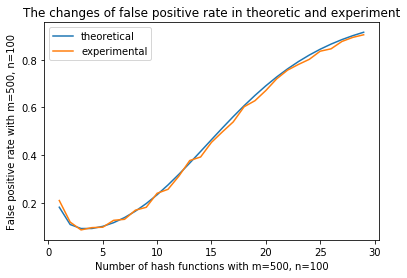

In [44]:
#plot the changes of false positive rate when we increase the number of hash functions
plt.plot(index, theoretical_result, label = 'theoretical')    
plt.plot(index, avg_fp_simulation, label = 'experimental')
plt.xlabel('Number of hash functions with m=500, n=100')
plt.ylabel("False positive rate with m=500, n=100")
plt.title("The changes of false positive rate in theoretic and experiment")
plt.legend()
plt.show() 

- The result of theoretical approach and experimental approach is equal
- As we can see the figure above, both lines are almost matched so the false positive rate in simulation approach is close to the theoretical approach.

- The optimal `k` maybe different (in other runs) because `k` needs to be an integer so when calculate `k`, I use int(A) to take the integer smaller than actual k.

-------

# 6. [#ComputationalCritique]

- Identify and list (if any) corner cases for CBFs.

- If one bit has really big value and accidentally we check one element is false positive, and we delete that element from the list, it will be wrong.
    - If false positive happens, that means we do not have that element in the data so we cannot delete it.
    - However, if we check corresponding bits of that element is possible to delete, we will delete -> wrong way

-------

# HC

#algorithm: In this assignment, I write the pseudocode and implement the code step by step. I clearly explain why I choose the hash function and commenting all codes I have. The algorithm is for the high-professional reader so I can use some specific idea such as ascii or universal hashing function

#sampling: I create the model, stimulates the CBF with different tests cases and interpret the modelling by creating appropriate sample size. To mitigate the bias, I use the random library with seed to make sure the random tachnique goes well in the assignment.